In [6]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [7]:
from scipy.optimize import curve_fit

<img src='./planck/planck.png' width='50%'>

In [8]:
Theta=np.array([8,6,4,2,0],dtype=int)

In [10]:
f1={} # empty dictionary

for theta in Theta:
    f1[theta]=pd.read_csv(f'./planck/planck_{theta}degree.csv')


In [11]:
f1[8]

,V,100I
0,2.00,0.0
1,1.70,0.2
2,1.65,0.4
3,1.62,0.6
4,1.60,1.2
5,1.57,1.8
6,1.55,2.0
7,1.52,3.0
8,1.50,4.0
9,1.47,5.6


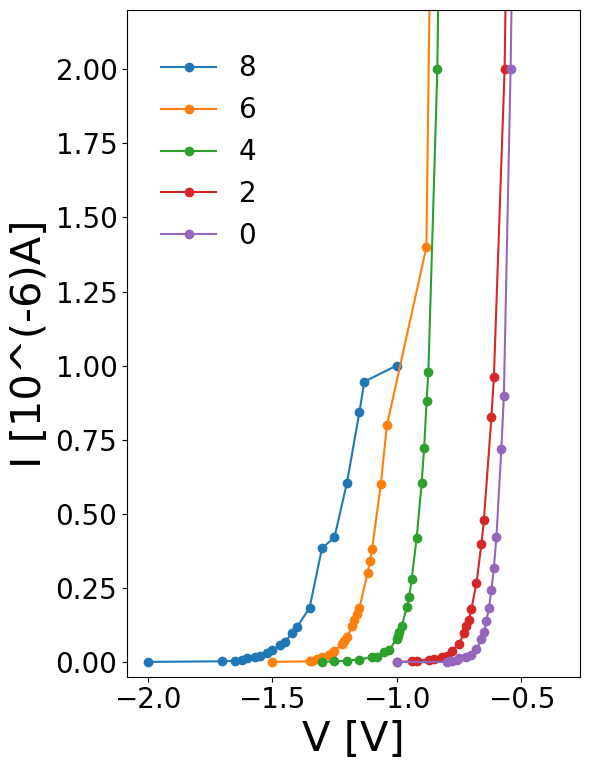

In [29]:
r=3
fig, ax = plt.subplots(figsize=(r*2,r*2.6))
#ax.set_xlim(0,300)
ax.set_ylim(-0.05,2.2)
ax.set_xlabel(r'V [V]', fontsize=30)
ax.set_ylabel(r"I [10^(-6)A]", fontsize=30)
ax.tick_params(labelsize=20)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

marker='o'

for theta in Theta:
    label=f'{theta}'
    x=-f1[theta]['V']
    y=f1[theta]['100I']/100
    ax.plot(x,y,'-',marker=marker,label=label)

#ax.set_title("xxx", fontsize=30)
legend=ax.legend(bbox_to_anchor=(0.05,0.95), loc='upper left', borderaxespad=0, fontsize=20, ncol=1)
frame = legend.get_frame()
frame.set_linewidth(0)
fig.tight_layout()


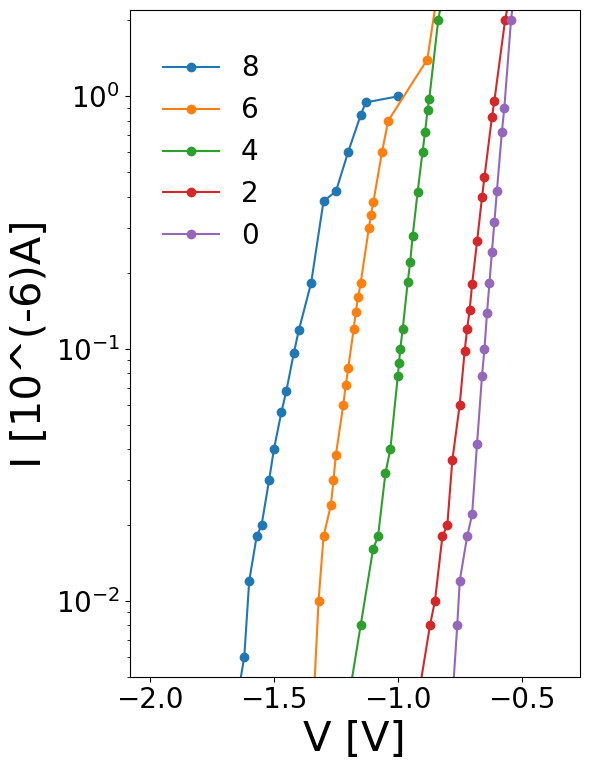

In [41]:
r=3
fig, ax = plt.subplots(figsize=(r*2,r*2.6))
#ax.set_xlim(0,300)
ax.set_ylim(5*10**(-3),2.2)
ax.set_xlabel(r'V [V]', fontsize=30)
ax.set_ylabel(r"I [10^(-6)A]", fontsize=30)
ax.tick_params(labelsize=20)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])

ax.set_yscale('log')

marker='o'

for theta in Theta:
    label=f'{theta}'
    x=-f1[theta]['V']
    y=f1[theta]['100I']/100
    ax.plot(x,y,'-',marker=marker,label=label)

#ax.set_title("xxx", fontsize=30)
legend=ax.legend(bbox_to_anchor=(0.05,0.95), loc='upper left', borderaxespad=0, fontsize=20, ncol=1)
frame = legend.get_frame()
frame.set_linewidth(0)
fig.tight_layout()


In [30]:
omega=np.array([5.09,5.56,6.14,6.86,7.78])
vol=np.array([0.73,0.85,1.10,1.33,1.63])

In [31]:
def func(x, a, b):
    return a*x+b

In [32]:
popt, pcov = curve_fit(func, omega*10**14,vol*1.6*10**(-19))

In [33]:
popt[0],pcov[0,0]

(5.454628747783099e-34, 2.992839545585861e-70)

## 6.62607015×10^(−34) J*s

In [34]:
popt[1],pcov[1,1]

(-1.6239796308098123e-19, 1.20976143669259e-40)

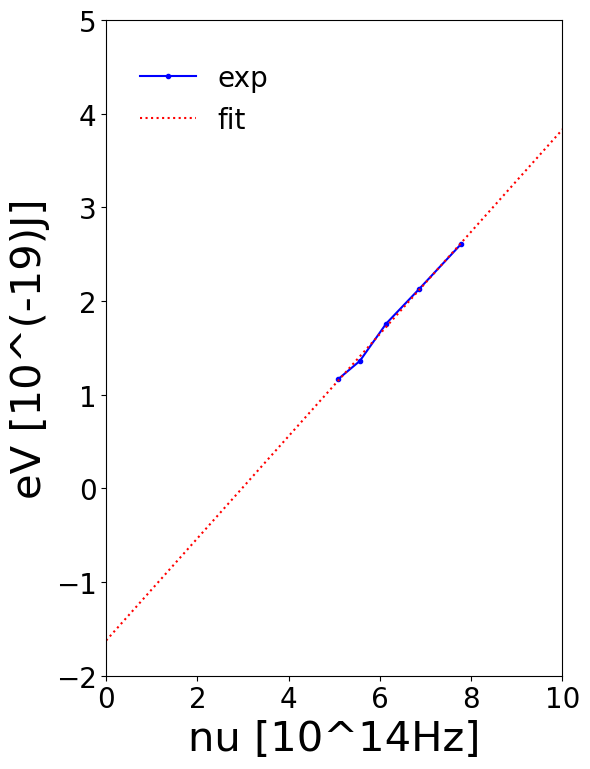

In [38]:
r=3
fig, ax = plt.subplots(figsize=(r*2,r*2.6))
ax.set_xlim(0,10)
ax.set_ylim(-2,5)
ax.set_xlabel(r'nu [10^14Hz]', fontsize=30)
ax.set_ylabel(r"eV [10^(-19)J]", fontsize=30)
ax.tick_params(labelsize=20)
#ax.set_xticks([0.0,0.2,0.4,0.6,0.8,1.0])
#ax.set_yticks([0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1.0])


marker='o'
omega2=0.1*np.arange(1000)

ax.plot(omega,vol*1.6,'b.-',label=r'exp')
ax.plot(omega2,func(omega2*10**14,*popt)*10**(19),'r:',label=r'fit')

#ax.set_title("xxx", fontsize=30)
legend=ax.legend(bbox_to_anchor=(0.05,0.95), loc='upper left', borderaxespad=0, fontsize=20, ncol=1)
frame = legend.get_frame()
frame.set_linewidth(0)
fig.tight_layout()
